In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

In [4]:
import os
print(os.listdir("./input"))
import warnings            
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

['sign-language-digits-dataset.zip', 'combats.csv', '.DS_Store', 'operations.csv', 'Weather Station Locations.csv', 'pokemon.csv', 'tests.csv', 'column_2C_weka.csv', 'Summary of Weather.csv', 'column_3C_weka.csv', 'Sign-language-digits-dataset']


In [5]:
# bombing data
aerial = pd.read_csv("./input/operations.csv")
# first weather data that includes locations like country, latitude and longitude.
weather_station_location = pd.read_csv("./input/Weather Station Locations.csv")
# Second weather data that includes measured min, max and mean temperatures
weather = pd.read_csv("./input/Summary of Weather.csv")

In [6]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 46 columns):
Mission ID                               178281 non-null int64
Mission Date                             178281 non-null object
Theater of Operations                    175123 non-null object
Country                                  126494 non-null object
Air Force                                126444 non-null object
Unit ID                                  50913 non-null object
Aircraft Series                          178165 non-null object
Callsign                                 21 non-null object
Mission Type                             47186 non-null object
Takeoff Base                             3383 non-null object
Takeoff Location                         3338 non-null object
Takeoff Latitude                         2981 non-null object
Takeoff Longitude                        2980 non-null float64
Target ID                                127406 non-null object
Target 

In [7]:
aerial.head()

Mission ID Mission Date Theater of Operations Country Air Force  \
0           1    8/15/1943                   MTO     USA     12 AF   
1           2    8/15/1943                   PTO     USA      5 AF   
2           3    8/15/1943                   MTO     USA     12 AF   
3           4    8/15/1943                   MTO     USA     12 AF   
4           5    8/15/1943                   PTO     USA      5 AF   

         Unit ID Aircraft Series Callsign Mission Type          Takeoff Base  \
0  27 FBG/86 FBG             A36      NaN          NaN  PONTE OLIVO AIRFIELD   
1         400 BS             B24      NaN            1                   NaN   
2  27 FBG/86 FBG             A36      NaN          NaN  PONTE OLIVO AIRFIELD   
3  27 FBG/86 FBG             A36      NaN          NaN  PONTE OLIVO AIRFIELD   
4         321 BS             B24      NaN            1                   NaN   

     ...     Incendiary Devices Weight (Tons) Fragmentation Devices  \
0    ...                                  NaN                   NaN   
1    ...                                  NaN                   NaN   
2    ...                                  NaN                   NaN   
3    ...                                  NaN                   NaN   
4    ...                                  NaN                   NaN   

   Fragmentation Devices Type Fragmentation Devices Weight (Pounds)  \
0                         NaN                                   NaN   
1                         NaN                                   NaN   
2                         NaN                                   NaN   
3                         NaN                                   NaN   
4                         NaN                                   NaN   

  Fragmentation Devices Weight (Tons) Total Weight (Pounds)  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Total Weight (Tons) Time Over Target Bomb Damage Assessment  Source ID  
0                10.0              NaN                    NaN        NaN  
1                20.0              NaN                    NaN     9366.0  
2                 9.0              NaN                    NaN        NaN  
3                 7.5              NaN                    NaN        NaN  
4                 8.0              NaN                    NaN    22585.0  

[5 rows x 46 columns]

In [9]:
aerial.describe()

Mission ID  Takeoff Longitude  Target Latitude  Target Longitude  \
count  178281.000000        2980.000000    169565.000000     169543.000000   
mean    89414.547041         220.618627        38.067793         43.340213   
std     51649.744549         454.046956        18.711405         59.681160   
min         1.000000        -177.328611       -37.416667       -179.451285   
25%     44571.000000          14.400000        26.250000          7.620000   
50%     89540.000000          29.851389        47.500000         11.330000   
75%    134171.000000          96.133222        50.930000         97.400000   
max    178742.000000        1355.000000      1108.000000       1000.650000   

       Altitude (Hundreds of Feet)  Airborne Aircraft  Attacking Aircraft  \
count                120826.000000       82242.000000       125108.000000   
mean                    139.026812          12.329771           10.218899   
std                     186.818278          12.514833           11.246399   
min                       0.000000           0.000000            0.000000   
25%                      70.000000           2.000000            2.000000   
50%                     122.000000          11.000000            7.000000   
75%                     223.000000          17.000000           12.000000   
max                   40000.000000         332.000000          332.000000   

       Bombing Aircraft  Aircraft Returned  Aircraft Failed      ...        \
count      81612.000000         133.000000       247.000000      ...         
mean          12.347486           2.157895         4.275304      ...         
std           12.573549           1.369816         5.924758      ...         
min            0.000000           1.000000         1.000000      ...         
25%            2.000000           1.000000         1.000000      ...         
50%           11.000000           2.000000         2.000000      ...         
75%           18.000000           3.000000         4.000000      ...         
max          332.000000           7.000000        48.000000      ...         

       High Explosives Weight (Tons)  Incendiary Devices  \
count                  146201.000000         3283.000000   
mean                       23.911995          132.001965   
std                        90.092020          498.596761   
min                         0.000000            0.000000   
25%                         2.000000            7.000000   
50%                         9.000000           14.000000   
75%                        30.000000           32.000000   
max                     20000.000000         4875.000000   

       Incendiary Devices Weight (Pounds)  Incendiary Devices Weight (Tons)  \
count                          356.000000                      25732.000000   
mean                         19962.732022                         21.527213   
std                          45331.714255                         66.692639   
min                              0.000000                          0.000000   
25%                            218.750000                          1.000000   
50%                           2640.000000                          6.000000   
75%                          12500.000000                         18.000000   
max                         420000.000000                        999.000000   

       Fragmentation Devices  Fragmentation Devices Weight (Pounds)  \
count            5768.000000                             194.000000   
mean              102.684560                            2065.630928   
std               158.941650                            2424.138566   
min                 0.000000                               0.000000   
25%                10.000000                             598.400000   
50%                38.461538                            1500.000000   
75%               133.333333                            2400.000000   
max              3000.000000                           20640.000000   

       Fragmentat

In [10]:
# drop countries that are NaN
aerial = aerial[pd.isna(aerial.Country)==False]
# drop if target longitude is NaN
aerial = aerial[pd.isna(aerial['Target Longitude'])==False]
# Drop if takeoff longitude is NaN
aerial = aerial[pd.isna(aerial['Takeoff Longitude'])==False]
# drop unused features
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
aerial.drop(drop_list, axis=1,inplace = True)
aerial = aerial[ aerial.iloc[:,8]!="4248"] # drop this takeoff latitude 
aerial = aerial[ aerial.iloc[:,9]!=1355]   # drop this takeoff longitude

In [11]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 0 to 178080
Data columns (total 17 columns):
Mission Date             2555 non-null object
Theater of Operations    2555 non-null object
Country                  2555 non-null object
Air Force                2505 non-null object
Aircraft Series          2528 non-null object
Callsign                 10 non-null object
Takeoff Base             2555 non-null object
Takeoff Location         2555 non-null object
Takeoff Latitude         2555 non-null object
Takeoff Longitude        2555 non-null float64
Target Country           2499 non-null object
Target City              2552 non-null object
Target Type              602 non-null object
Target Industry          81 non-null object
Target Priority          230 non-null object
Target Latitude          2555 non-null float64
Target Longitude         2555 non-null float64
dtypes: float64(3), object(14)
memory usage: 359.3+ KB


In [12]:
# what we will use only
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
WBAN                161 non-null int64
NAME                161 non-null object
STATE/COUNTRY ID    161 non-null object
Latitude            161 non-null float64
Longitude           161 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [13]:
# what we will use only
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
STA         119040 non-null int64
Date        119040 non-null object
MeanTemp    119040 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


USA              1895
GREAT BRITAIN     544
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64


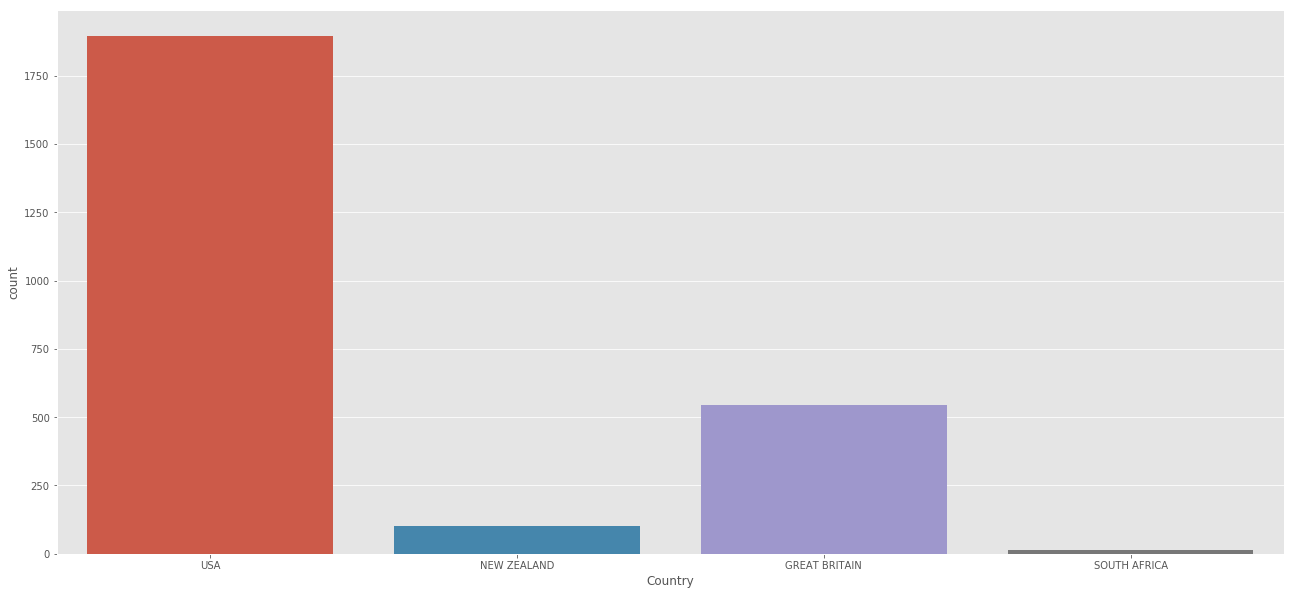

In [14]:
# country
print(aerial['Country'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Country'])
plt.show()

ITALY      1104
BURMA       335
LIBYA       272
TUNISIA     113
GREECE       87
EGYPT        80
JAPAN        71
CHINA        52
SICILY       46
GERMANY      41
Name: Target Country, dtype: int64


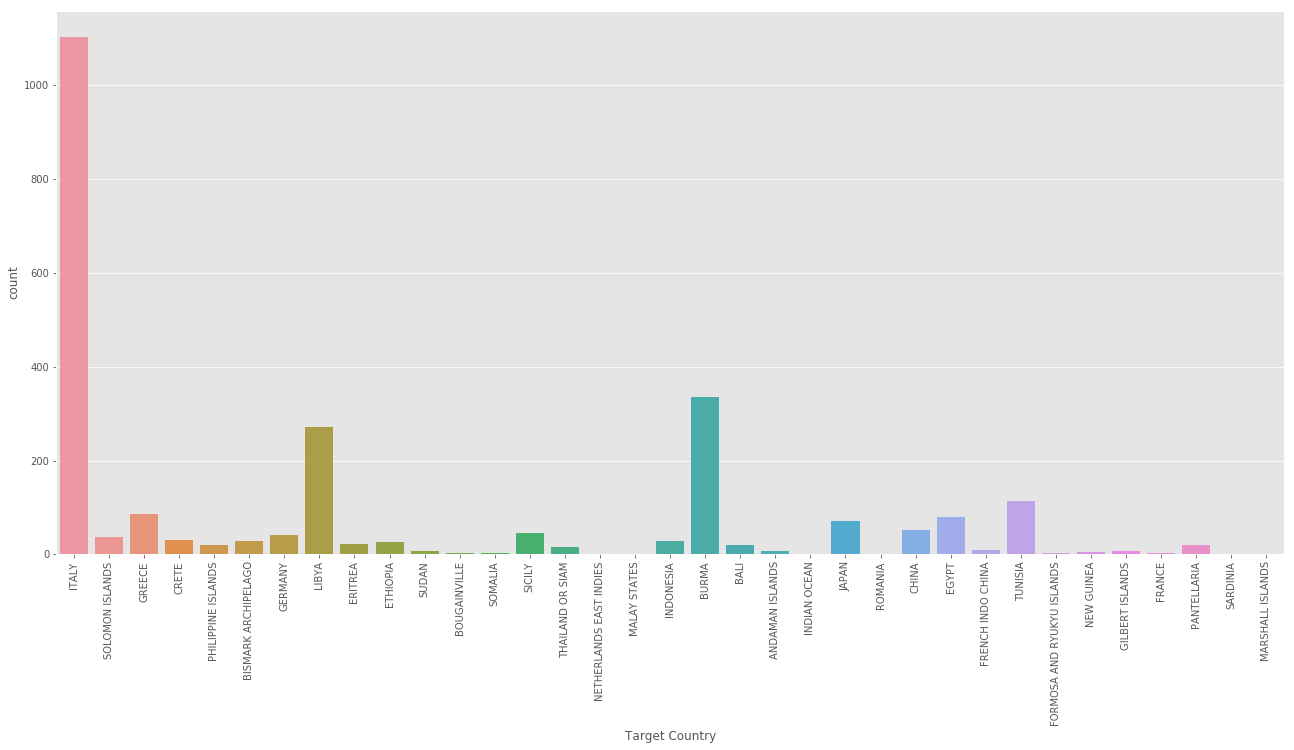

In [15]:
# Top target countries
print(aerial['Target Country'].value_counts()[:10])
plt.figure(figsize=(22,10))
sns.countplot(aerial['Target Country'])
plt.xticks(rotation=90)
plt.show()

In [16]:
# Aircraft Series
data = aerial['Aircraft Series'].value_counts()
print(data[:10])
data = [go.Bar(
            x=data[:10].index,
            y=data[:10].values,
            hoverinfo = 'text',
            marker = dict(color = 'rgba(177, 14, 22, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Aircraft Series',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

A36             990
B25             416
B24             337
BLEN            180
LIB             145
WELL            129
B17             119
PV-1 VENTURA     70
WHIT             32
HALI             18
Name: Aircraft Series, dtype: int64


In [17]:
# ATTACK
aerial["color"] = ""
aerial.color[aerial.Country == "USA"] = "rgb(0,116,217)"
aerial.color[aerial.Country == "GREAT BRITAIN"] = "rgb(255,65,54)"
aerial.color[aerial.Country == "NEW ZEALAND"] = "rgb(133,20,75)"
aerial.color[aerial.Country == "SOUTH AFRICA"] = "rgb(255,133,27)"

data = [dict(
    type='scattergeo',
    lon = aerial['Takeoff Longitude'],
    lat = aerial['Takeoff Latitude'],
    hoverinfo = 'text',
    text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = aerial["color"],
        opacity = 0.7),
)]
layout = dict(
    title = 'Countries Take Off Bases ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [18]:
# Bombing paths
airports = [ dict(
        type = 'scattergeo',
        lon = aerial['Takeoff Longitude'],
        lat = aerial['Takeoff Latitude'],
        hoverinfo = 'text',
        text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
        mode = 'markers',
        marker = dict( 
            size=5, 
            color = aerial["color"],
            line = dict(
                width=1,
                color = "white"
            )
        ))]

targets = [ dict(
        type = 'scattergeo',
        lon = aerial['Target Longitude'],
        lat = aerial['Target Latitude'],
        hoverinfo = 'text',
        text = "Target Country: "+aerial["Target Country"]+" Target City: "+aerial["Target City"],
        mode = 'markers',
        marker = dict( 
            size=1, 
            color = "red",
            line = dict(
                width=0.5,
                color = "red"
            )
        ))]
        

flight_paths = []
for i in range( len( aerial['Target Longitude'] ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            lon = [ aerial.iloc[i,9], aerial.iloc[i,16] ],
            lat = [ aerial.iloc[i,8], aerial.iloc[i,15] ],
            mode = 'lines',
            line = dict(
                width = 0.7,
                color = 'black',
            ),
            opacity = 0.6,
        )
    )
    
layout = dict(
    title = 'Bombing Paths from Attacker Country to Target ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
    
fig = dict( data=flight_paths + airports+targets, layout=layout )
iplot( fig )